# Deep Feedforward Nets

In [3]:
from IPython.display import Image

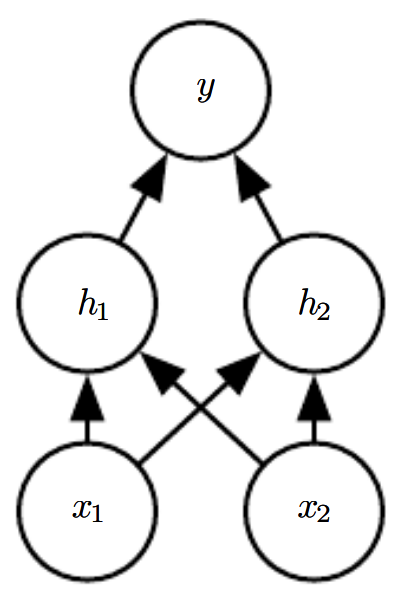

In [2]:
Image("imgs/feedforward_nets.png")

Notation:
* $X$: Data
* $x_i$: Some feautre of Data
* $f$: Intermediate computations
* $W$: Weights
* $h_i$: ith Layer
* $w_{i,j}$: weight, $w_{1,1}$ represents the arrow between $x_1$ and $h_1$ 
* $Y$: Output

Deep Feedforward Nets or MLP (MultiLayer Perceptrons) approximate a function $f$. We call the data as $X$ and $f(X)$ estimates $Y$. In feedforward nets we want to learn the parameters $W$. The simple defination of feedforward nets is $Y = f(X;W)$ where $Y$ is the prediction.

The reason we call these architecture as networks is the model is represented by composing together many different functions. We can say that each Layer represents a function. The function defination of the graph above is $f(X) = f^1(f^2(X;W))$. In feedforward neural networks, there are many layers. In this way; function can approximate to more complex problems.

## Example 0

In [33]:
import torch
X = torch.tensor([[3,1],[3,2],[1,1]])
Y_real = torch.tensor([100,120,60])
w0 = torch.tensor([8,9,10,11])
w1 = torch.tensor([5,6])

In [43]:
def f1(x,w,i):#hidden layer
    h1 = x[i][0]*w[0]+x[i][1]*w[2]
    h2 = x[i][0]*w[1]+x[i][1]*w[3]
    return h1,h2

def f2(x,w0,w1,i):#network
    h1,h2 = f1(x,w0,i)
    y = h1*w1[0]+h2*w1[1]
    return y

y = [f2(X,w0,w1,i) for i in range(len(X))]
y

[tensor(398), tensor(514), tensor(210)]

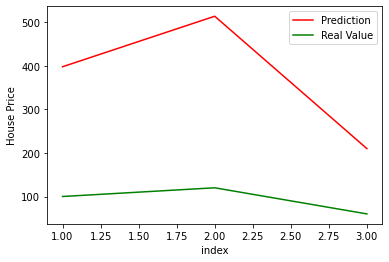

In [49]:
import matplotlib.pyplot as plt
plt.plot([1,2,3],y,color = "Red",label = "Prediction")
plt.plot([1,2,3],Y_real, color = "Green",label = "Real Value")
plt.xlabel("index")
plt.ylabel("House Price")
plt.legend()


The parameters we defined does not fit for this estimation. Optimization of the parameters anathor topic that we will discuss later.

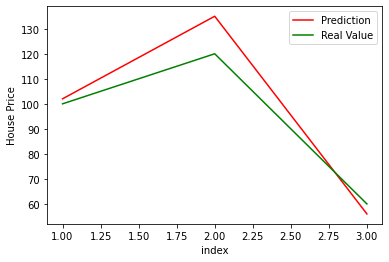

In [51]:
w0 = torch.tensor([4,5,6,7])
w1 = torch.tensor([2,3])
y = [f2(X,w0,w1,i) for i in range(len(X))]

plt.plot([1,2,3],y,color = "Red",label = "Prediction")
plt.plot([1,2,3],Y_real, color = "Green",label = "Real Value")
plt.xlabel("index")
plt.ylabel("House Price")
plt.legend()

This looks better.

We made a regression. We estimated continiues values like house prices above. We call this as Regression Problem. 

# Classification Problem

One of the most popular usage of feedforward nets is classification. Let's say we have $X$ of data and the data contains information about the credit rating, the $Y$ labels indicate whether the person has received a credit. A new person comes to the bank and asks for credit, the feedforward net that designed for this problem must estimate whether the person will be able to repay the loan by using the data $X$. Model classifies people to 2 seperate classes; can repay / cannot repay. While model is doing it's job, it calculates $likelihood$. We will discuss likelihood later.

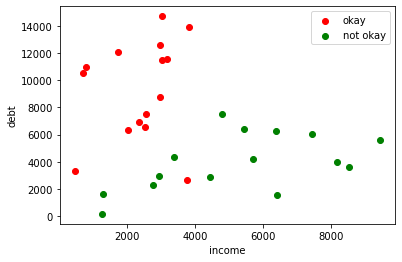

In [61]:
import numpy as np
plt.scatter(np.random.randint(0, 4000, size=15),np.random.randint(2000, 15000, size=15),color = "red",label = "okay")
plt.scatter(np.random.randint(1000,10000, size=15),np.random.randint(0,8000, size=15),color = "green",label = "not okay")
plt.xlabel("income")
plt.ylabel("debt")
plt.legend()

Imagine that we have a feature space like above and we want to seperate $okay$ and $not okay$ classes with some function $f$.

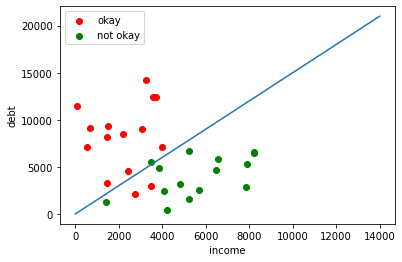

In [66]:
plt.scatter(np.random.randint(0, 4000, size=15),np.random.randint(2000, 15000, size=15),color = "red",label = "okay")
plt.scatter(np.random.randint(1000,10000, size=15),np.random.randint(0,8000, size=15),color = "green",label = "not okay")
plt.plot(np.arange(15)*1000,np.arange(15)*1500)
plt.xlabel("income")
plt.ylabel("debt")
plt.legend()

The blue line is the function $f$. $f = 3/2*X$. The line looks fine for this problem. But ....

# Non Linear Regions

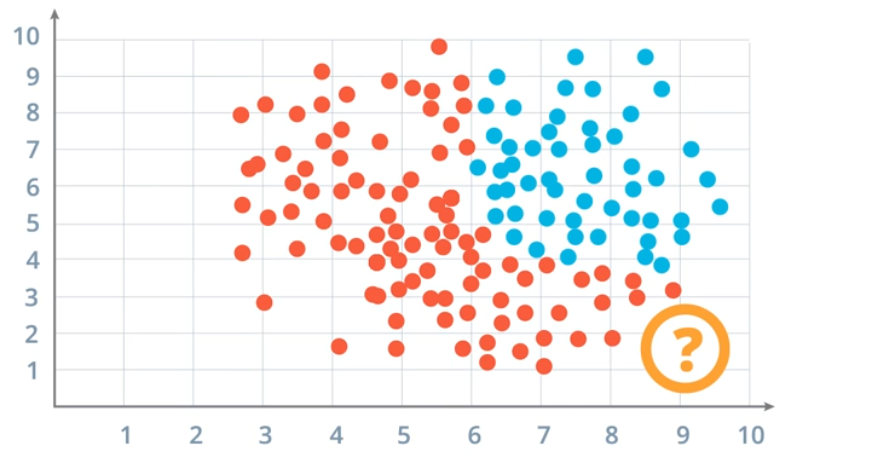

In [84]:
Image("imgs/nonlinear_region.png")

When we interested in the graph above, we see that we cannot seperate the regions with a linear line. We need to approximate a function that can seperates red and blue points, maybe a curve. Lets define a network and look if we can approximate a function that represents a curve. 

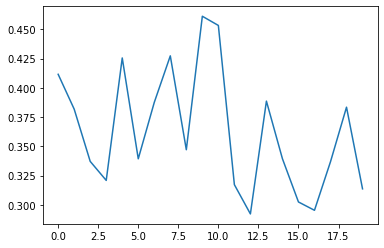

In [114]:
from torch import nn
X = torch.Tensor(np.random.rand(20,3))
model = nn.Sequential(nn.Linear(3,10),nn.Linear(10,5),nn.Linear(5,1))
Y_head = model(X)
plt.plot(np.arange(20),Y_head.detach().numpy())